In [126]:
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import random

In [146]:
df = pd.read_csv('weather.csv')
df.head(7)

,wind,snowfall,humidity,temperature,open
0,17,10,10,19,1
1,12,6,68,48,0
2,24,9,0,13,1
3,14,18,66,-7,1
4,28,13,2,-5,2
5,38,6,16,-2,2
6,15,8,67,-13,1


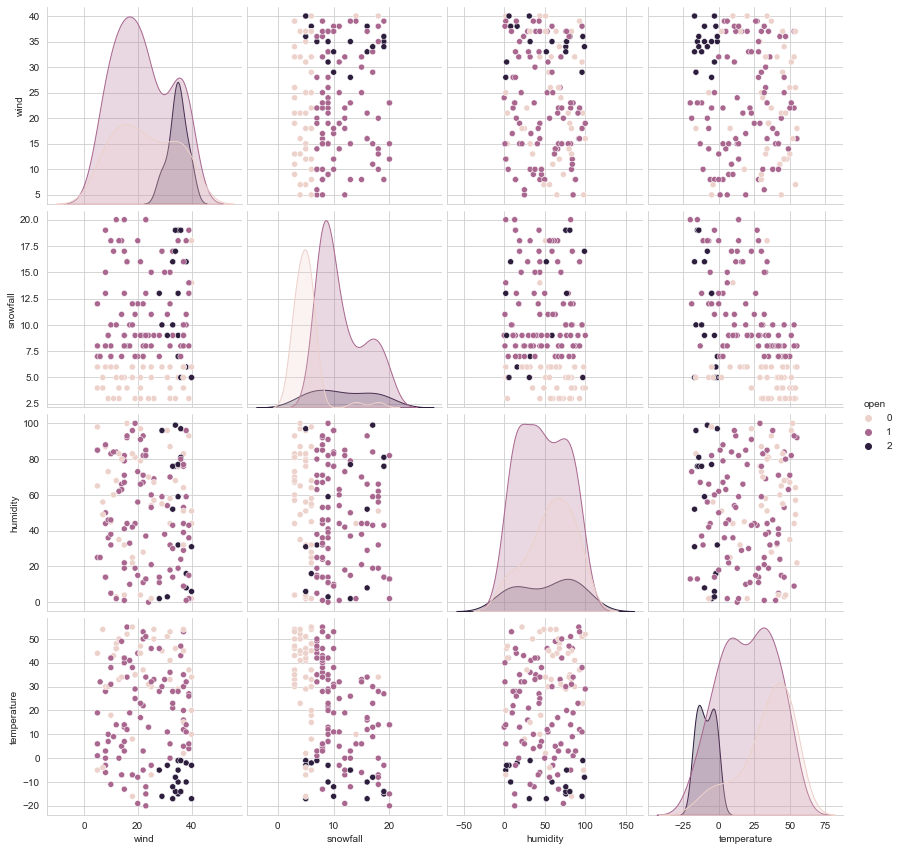

In [128]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='open', height=3);
plt.show()

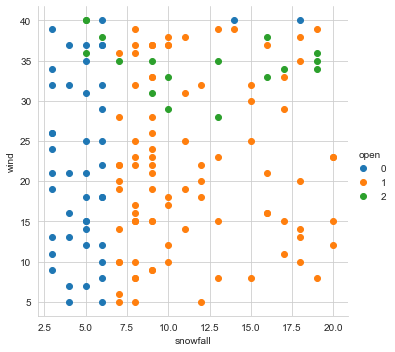

In [153]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='open', height=5).map(plt.scatter, 'snowfall', 'wind').add_legend();

In [130]:
# initialize independent variable X, and dependent variable Y
X = df.iloc[:,:4]
X.head()

,wind,snowfall,humidity,temperature
0,17,10,10,19
1,12,6,68,48
2,24,9,0,13
3,14,18,66,-7
4,28,13,2,-5


In [131]:
y = df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    1
4    2
Name: open, dtype: int64

In [132]:
# Normalize the Data
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.60358208,  0.08053723, -1.38286247, -0.07793607],
       [-1.06978863, -0.75260649,  0.5778454 ,  1.26207151],
       [ 0.04910709, -0.1277487 , -1.72091556, -0.35517902],
       [-0.88330601,  1.74682465,  0.51023479, -1.27932218]])

In [154]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = None)

In [156]:
# Train
knmodel = KNeighborsClassifier(n_neighbors = 3)
knmodel.fit(X_train, y_train)
y_predict = knmodel.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1], dtype=int64)

In [135]:
# Accuracy Test
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8444444444444444

In [159]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 6  3  0]
 [ 4 26  0]
 [ 0  2  4]]


In [161]:
cr = classification_report(y_test, y_predict)
print('Classification Report:')
print (cr)
acc_score = accuracy_score(y_test,y_predict)
print('Accuracy:',acc_score)

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.84      0.87      0.85        30
           2       1.00      0.67      0.80         6

    accuracy                           0.80        45
   macro avg       0.81      0.73      0.76        45
weighted avg       0.81      0.80      0.80        45

Accuracy: 0.8


In [138]:
prediction_output = pd.DataFrame(data = [y_test.values, y_predict], index = ['y_test', 'y_predict'])

In [139]:
prediction_output.transpose()

,y_test,y_predict
0,1,1
1,2,2
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


In [140]:
prediction_output.iloc[0,:].value_counts()

1    29
0    12
2     4
Name: y_test, dtype: int64

In [141]:
#Decision Tree
dtree = DecisionTreeClassifier()

In [142]:
model = dtree.fit(X_train, y_train)

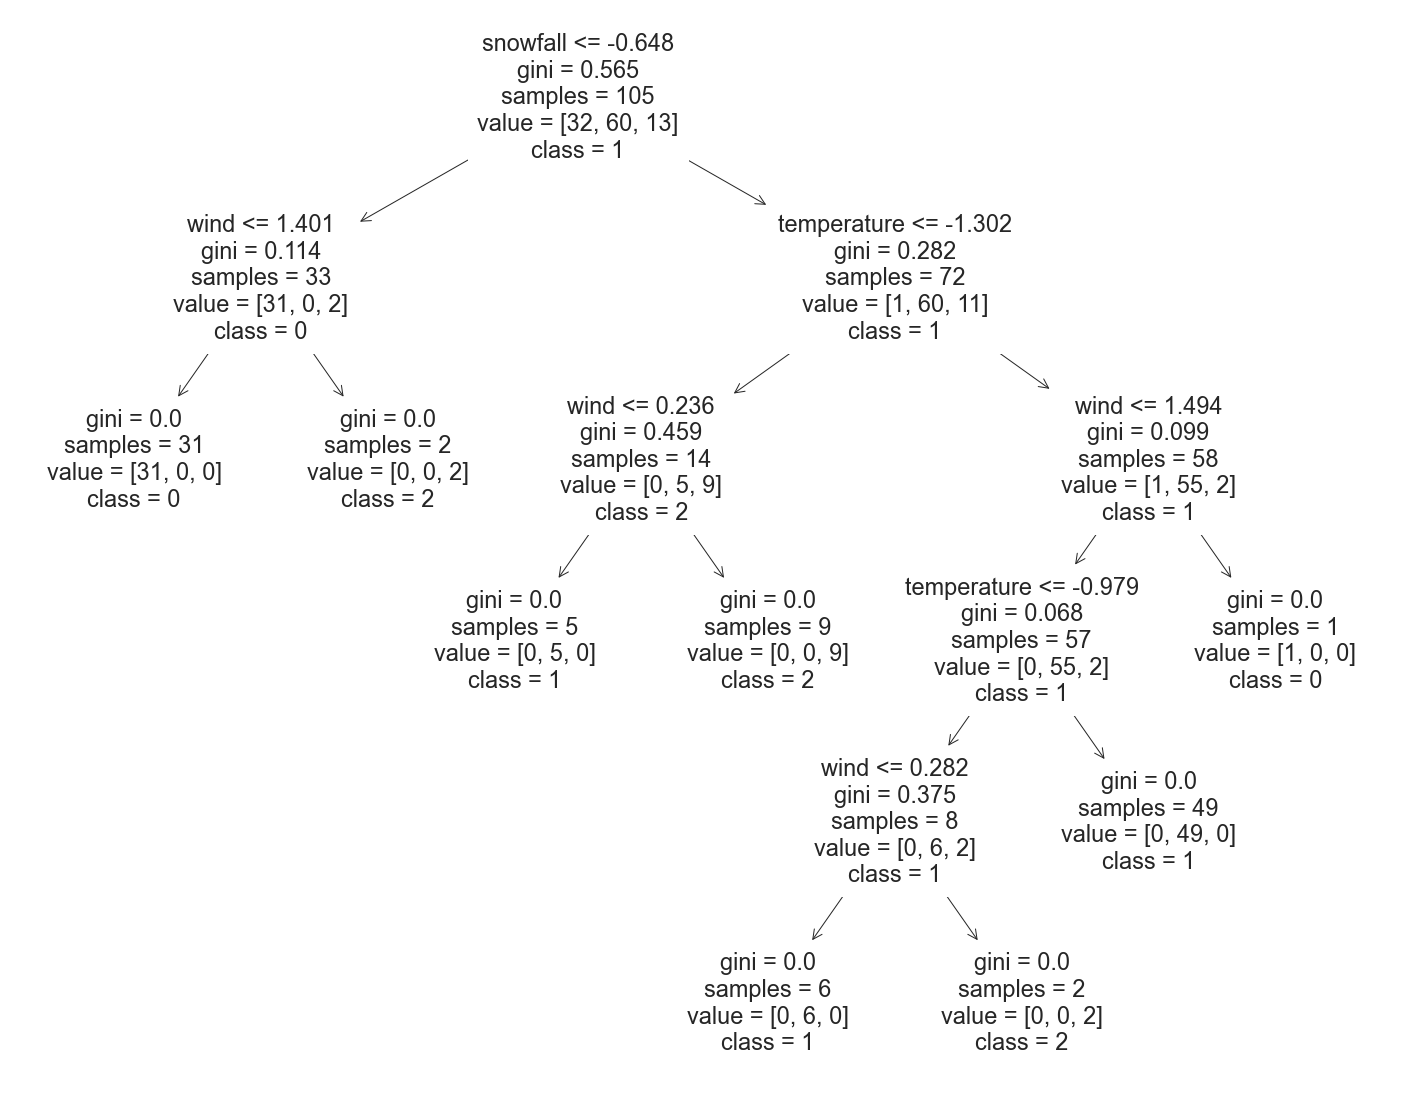

In [143]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names = ['wind','snowfall','humidity','temperature'], class_names = ['0','1','2'])